In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.insert(0,'./src')
from geometry import *
from solver import *
from some_weird_geometry import *


In [21]:
G = circle(n=128)
G.build()
v = np.zeros_like(G.x)
u = 1- G.y**2
U = np.array([u,v]).T

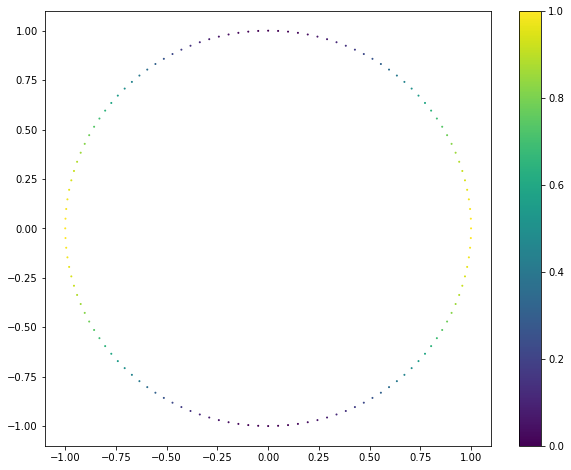

In [23]:
plt.figure(figsize=(10,8))
plt.scatter(G.x,G.y,s=1,c=u)
plt.colorbar()

# traditional solver

In [25]:
solver = stokes2d(G)
omega = solver.solve(U)

gmres starts solving the Nystorm, please wait...
gmres converged


In [35]:
x = np.linspace(-0.8,0.8,500)
y = np.linspace(-0.8,0.8,500)
x,y = np.meshgrid(x,y)
x = x.flatten()
y = y.flatten()
z = x+1j*y
valid = np.where(np.abs(z)<0.8)
x = x[valid]
y = y[valid]
z = z[valid]

In [36]:
velocity = solver.compute_velocity(z,omega)

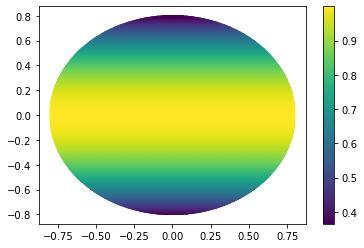

In [37]:
plt.scatter(x,y,s=1,c=velocity[:,0])
plt.colorbar()

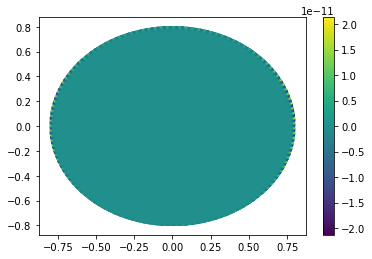

In [38]:
plt.scatter(x,y,s=1,c=velocity[:,1])
plt.colorbar()

# FMM evaluation 

In [ ]:
sys.path.insert(0,'./src/bbFMM2D-Python/')

In [ ]:
def compute_velocity(self, z, omega):
        
        t = self.geometry.get_t()
        dt = self.geometry.get_dt_da()*self.geometry.da

        if isinstance(z, numbers.Number):
            t_minus_z = t - z
            t_minus_z_sq = t_minus_z**2

            phi = np.sum(omega*dt/t_minus_z)/(2j*np.pi)
            d_phi = np.sum(omega*dt/t_minus_z_sq)/(2j*np.pi)

            psi = (1/(2j*np.pi))*(
                2*np.sum(np.real(np.conjugate(omega)*dt)/t_minus_z)
                - np.sum(np.conjugate(t)*omega*dt/t_minus_z_sq))

        else:
            assert isinstance(z, np.ndarray)
            shape = z.shape
            z = z.flatten()
            
            t_minus_z = t[np.newaxis, :] - z[:, np.newaxis]
            t_minus_z_sq = t_minus_z**2

            phi = np.sum((omega*dt)[np.newaxis, :] /
                         t_minus_z, axis=1)/(2j*np.pi)
            d_phi = np.sum((omega*dt)[np.newaxis, :] /
                           (t_minus_z_sq), axis=1)/(2j*np.pi)

            psi = (1/(2j*np.pi))*(
                2*np.sum(np.real((np.conjugate(omega)*dt)
                         [np.newaxis, :])/t_minus_z, axis=1)
                - np.sum((np.conjugate(t)*omega*dt)[np.newaxis, :]/t_minus_z_sq, axis=1))

        ret = phi + z*np.conjugate(d_phi) + np.conjugate(psi)
        
        ret = ret.reshape(shape)
        
        return H2U(ret)